In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.datasets import mnist
from collections import Counter
from imblearn.over_sampling import SMOTE  # Import SMOTE for balancing

In [ ]:
# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
# Flatten images
X_train = X_train.reshape(X_train.shape[0], -1) / 255.0
X_test = X_test.reshape(X_test.shape[0], -1) / 255.0

In [ ]:
# Check class imbalance
train_counts = Counter(y_train)
test_counts = Counter(y_test)
print("Class distribution in training set:", train_counts)
print("Class distribution in test set:", test_counts)

Class distribution in training set: Counter({np.uint8(1): 6742, np.uint8(7): 6265, np.uint8(3): 6131, np.uint8(2): 5958, np.uint8(9): 5949, np.uint8(0): 5923, np.uint8(6): 5918, np.uint8(8): 5851, np.uint8(4): 5842, np.uint8(5): 5421})
Class distribution in test set: Counter({np.uint8(1): 1135, np.uint8(2): 1032, np.uint8(7): 1028, np.uint8(3): 1010, np.uint8(9): 1009, np.uint8(4): 982, np.uint8(0): 980, np.uint8(8): 974, np.uint8(6): 958, np.uint8(5): 892})


In [ ]:
# Apply SMOTE to balance dataset
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
# Check new class distribution after SMOTE
train_resampled_counts = Counter(y_train_resampled)
print("Class distribution after SMOTE:", train_resampled_counts)

Class distribution after SMOTE: Counter({np.uint8(5): 6742, np.uint8(0): 6742, np.uint8(4): 6742, np.uint8(1): 6742, np.uint8(9): 6742, np.uint8(2): 6742, np.uint8(3): 6742, np.uint8(6): 6742, np.uint8(7): 6742, np.uint8(8): 6742})


In [ ]:

# Feature extraction using PCA
pca = PCA(n_components=50)  # Reduce dimensions while retaining variance
X_train_pca = pca.fit_transform(X_train_resampled)
X_test_pca = pca.transform(X_test)



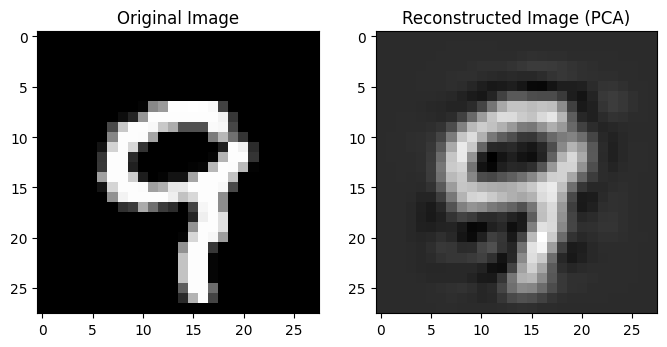

In [ ]:
# Select a random image from the test set
random_index = np.random.randint(0, X_test.shape[0])
original_image = X_test[random_index].reshape(28, 28)

# Transform and inverse transform to reconstruct the image using PCA
pca_transformed = pca.transform(X_test[random_index].reshape(1, -1))
reconstructed_image = pca.inverse_transform(pca_transformed).reshape(28, 28)

# Plot original and reconstructed images
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(original_image, cmap='gray')
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(reconstructed_image, cmap='gray')
plt.title("Reconstructed Image (PCA)")

plt.show()



Training Logistic Regression...
Logistic Regression Cross-validation accuracy: 0.9085
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.96       980
           1       0.97      0.98      0.97      1135
           2       0.91      0.88      0.90      1032
           3       0.89      0.90      0.89      1010
           4       0.91      0.93      0.92       982
           5       0.87      0.86      0.87       892
           6       0.93      0.94      0.93       958
           7       0.93      0.91      0.92      1028
           8       0.86      0.87      0.86       974
           9       0.89      0.89      0.89      1009

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



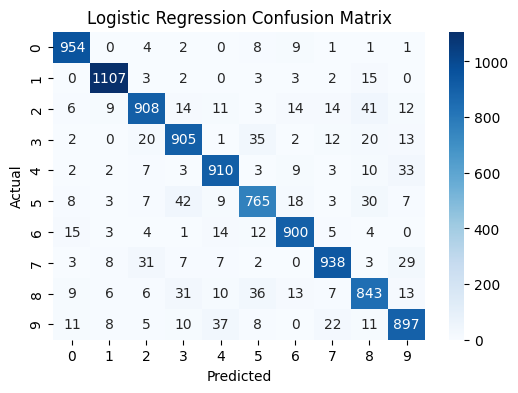


Training SVM...
SVM Cross-validation accuracy: 0.9840
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.99      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.98      0.98       892
           6       0.99      0.98      0.99       958
           7       0.98      0.97      0.98      1028
           8       0.98      0.99      0.98       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



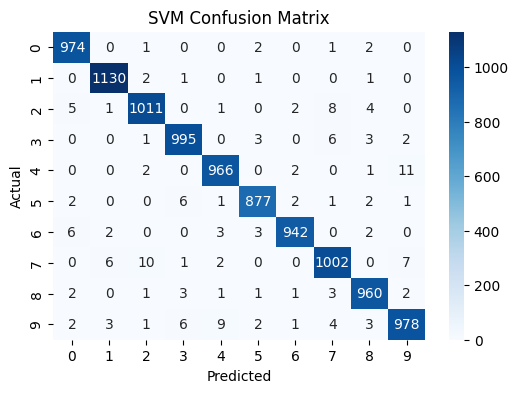


Training Random Forest...
Random Forest Cross-validation accuracy: 0.9595
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.95      0.95      0.95      1032
           3       0.94      0.94      0.94      1010
           4       0.94      0.95      0.95       982
           5       0.95      0.96      0.95       892
           6       0.96      0.98      0.97       958
           7       0.96      0.95      0.95      1028
           8       0.94      0.92      0.93       974
           9       0.94      0.92      0.93      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



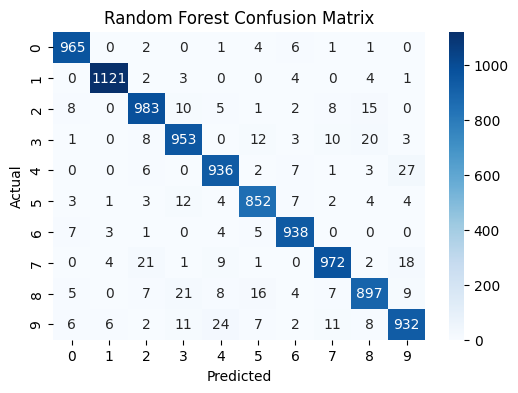

In [ ]:
# Train and evaluate classification models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(kernel='rbf', C=1),
    "Random Forest": RandomForestClassifier(n_estimators=100)
}

for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train_pca, y_train_resampled)
    y_pred = model.predict(X_test_pca)

    # Cross-validation
    scores = cross_val_score(model, X_train_pca, y_train_resampled, cv=5)
    print(f"{name} Cross-validation accuracy: {scores.mean():.4f}")

    # Evaluation metrics
    print(f"{name} Classification Report:\n", classification_report(y_test, y_pred))

    # Confusion Matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

In [ ]:
# Two-digit recognition (synthetic dataset by concatenating MNIST digits)
def create_two_digit_images(X, y):
    new_images, new_labels = [], []
    for i in range(len(X) - 1):
        img1, img2 = X[i].reshape(28, 28), X[i+1].reshape(28, 28)
        new_img = np.hstack((img1, img2)).flatten()
        new_label = int(f"{y[i]}{y[i+1]}")  # Concatenated label
        new_images.append(new_img)
        new_labels.append(new_label)
    return np.array(new_images), np.array(new_labels)

X_two_digit, y_two_digit = create_two_digit_images(X_train_resampled, y_train_resampled)
X_two_digit_test, y_two_digit_test = create_two_digit_images(X_test, y_test)

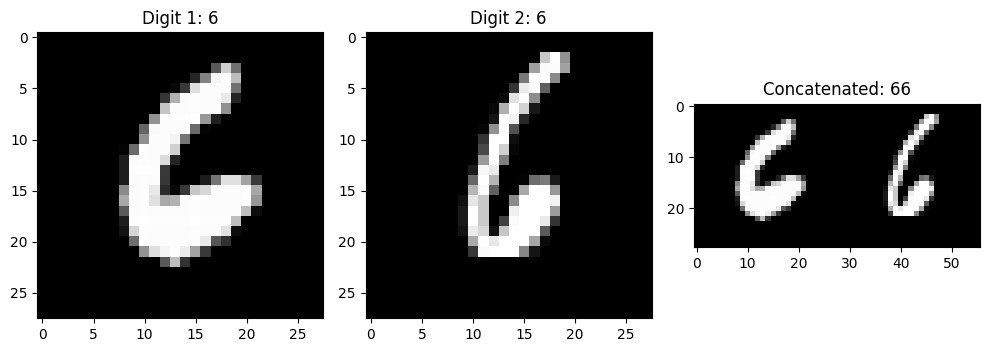

Shape of original image 1: (28, 28)
Shape of original image 2: (28, 28)
Shape after concatenation: (28, 56)


In [ ]:
# Select a random index to visualize the concatenation
random_index = np.random.randint(0, X_train_resampled.shape[0] - 1)

# Original images before concatenation
img1 = X_train_resampled[random_index].reshape(28, 28)
img2 = X_train_resampled[random_index + 1].reshape(28, 28)

# Concatenated image after concatenation
concatenated_img = np.hstack((img1, img2))

# Plot original images and concatenated image
plt.figure(figsize=(10, 4))

# Plot first original image
plt.subplot(1, 3, 1)
plt.imshow(img1, cmap='gray')
plt.title(f"Digit 1: {y_train_resampled[random_index]}")

# Plot second original image
plt.subplot(1, 3, 2)
plt.imshow(img2, cmap='gray')
plt.title(f"Digit 2: {y_train_resampled[random_index + 1]}")

# Plot concatenated image
plt.subplot(1, 3, 3)
plt.imshow(concatenated_img, cmap='gray')
plt.title(f"Concatenated: {y_train_resampled[random_index]}{y_train_resampled[random_index + 1]}")

plt.tight_layout()
plt.show()

# Print shapes of original and concatenated images
print(f"Shape of original image 1: {img1.shape}")
print(f"Shape of original image 2: {img2.shape}")
print(f"Shape after concatenation: {concatenated_img.shape}")


Original shape of X_two_digit: (67419, 1568)
Shape after PCA (training set): (67419, 50)
Shape after PCA (test set): (9999, 50)


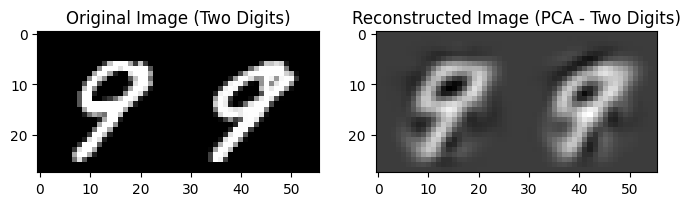

In [ ]:
# Apply PCA to the two-digit dataset
pca = PCA(n_components=50)  # Reduce to 50 dimensions
X_two_digit_pca = pca.fit_transform(X_two_digit)
X_two_digit_test_pca = pca.transform(X_two_digit_test)

# Print results
print(f"Original shape of X_two_digit: {X_two_digit.shape}")
print(f"Shape after PCA (training set): {X_two_digit_pca.shape}")
print(f"Shape after PCA (test set): {X_two_digit_test_pca.shape}")

# Select a random two-digit image from the test set
random_index = np.random.randint(0, X_two_digit_test.shape[0])
original_image = X_two_digit_test[random_index].reshape(28, 56)  # 28x56 after concatenation

# Transform and inverse transform to reconstruct the image using PCA
pca_transformed = pca.transform(X_two_digit_test[random_index].reshape(1, -1))
reconstructed_image = pca.inverse_transform(pca_transformed).reshape(28, 56)

# Plot original and reconstructed images
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(original_image, cmap='gray')
plt.title("Original Image (Two Digits)")

plt.subplot(1, 2, 2)
plt.imshow(reconstructed_image, cmap='gray')
plt.title("Reconstructed Image (PCA - Two Digits)")

plt.show()

In [ ]:
# Train model on two-digit dataset
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_two_digit_pca, y_two_digit)
y_pred_two_digit = rf.predict(X_two_digit_test_pca)

In [ ]:
 # Evaluate two-digit model
print("\nTwo-Digit Classification Report:\n", classification_report(y_two_digit_test, y_pred_two_digit))


Two-Digit Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.98      0.67        86
           1       0.85      0.95      0.90       233
           2       0.84      0.55      0.67        96
           3       0.72      0.69      0.71        84
           4       0.68      0.67      0.67        82
           5       0.69      0.37      0.48        54
           6       0.74      0.75      0.75       105
           7       0.72      0.76      0.74        88
           8       0.66      0.65      0.65        71
           9       0.62      0.62      0.62        81
          10       0.72      0.94      0.82       108
          11       0.82      0.94      0.88       109
          12       0.91      0.82      0.86       238
          13       0.74      0.91      0.81       113
          14       0.68      0.86      0.76        94
          15       0.78      0.81      0.80        84
          16       0.72      0.82      0.77   

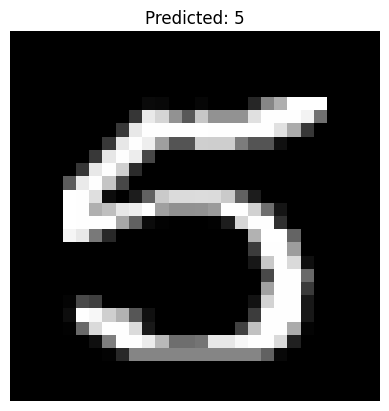

Predicted single-digit: 5


In [ ]:
# Predict a single random digit
random_idx = np.random.randint(0, len(X_test))
predicted_digit = models["Random Forest"].predict([X_test_pca[random_idx]])[0]
plt.imshow(X_test[random_idx].reshape(28, 28), cmap='gray')
plt.title(f"Predicted: {predicted_digit}")
plt.axis('off')
plt.show()
print(f"Predicted single-digit: {predicted_digit}")

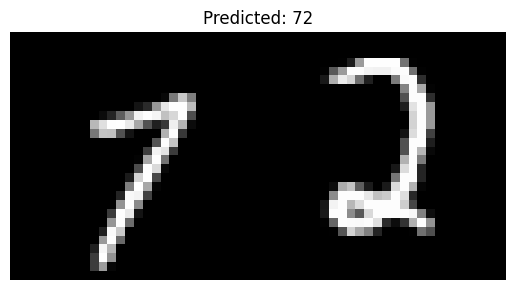

Predicted two-digit number: 72


In [ ]:
# Predict a random two-digit number
random_idx_2 = np.random.randint(0, len(X_two_digit_test))
predicted_two_digit = rf.predict([X_two_digit_test_pca[random_idx_2]])[0]
plt.imshow(X_two_digit_test[random_idx_2].reshape(28, 56), cmap='gray')
plt.title(f"Predicted: {predicted_two_digit}")
plt.axis('off')
plt.show()
print(f"Predicted two-digit number: {predicted_two_digit}")

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize data
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape for CNN input
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define CNN model
model = Sequential([
    Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))

# Save the trained model
model.save("mnist_cnn.h5")

print("Model training complete and saved as mnist_cnn.h5")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 50s 26ms/step - accuracy: 0.9082 - loss: 0.2939 - val_accuracy: 0.9864 - val_loss: 0.0416
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 25ms/step - accuracy: 0.9861 - loss: 0.0432 - val_accuracy: 0.9872 - val_loss: 0.0387
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 24ms/step - accuracy: 0.9911 - loss: 0.0275 - val_accuracy: 0.9907 - val_loss: 0.0273
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 47s 25ms/step - accuracy: 0.9937 - loss: 0.0208 - val_accuracy: 0.9880 - val_loss: 0.0393
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 47s 25ms/step - accuracy: 0.9944 - loss: 0.0158 - val_accuracy: 0.9915 - val_loss: 0.0277


Model training complete and saved as mnist_cnn.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


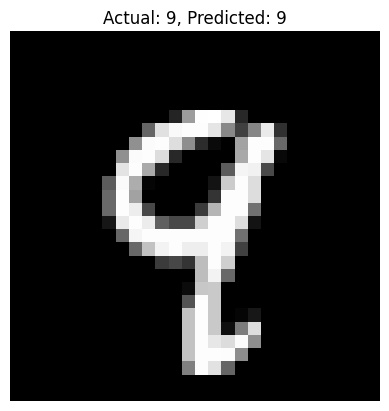

Actual Label: 9, Predicted Digit: 9


In [ ]:
# Load the trained model
model = tf.keras.models.load_model("mnist_cnn.h5")

# Load MNIST dataset
(_, _), (x_test, y_test) = mnist.load_data()

# Normalize and reshape test data
x_test = x_test / 255.0
x_test = x_test.reshape(-1, 28, 28, 1)

# Select a random image from the test set
random_index = np.random.randint(0, len(x_test))
random_image = x_test[random_index]
actual_label = y_test[random_index]

# Predict the digit
image_input = np.expand_dims(random_image, axis=0)  # Add batch dimension
prediction = model.predict(image_input)
predicted_digit = np.argmax(prediction)

# Display the image with the prediction
plt.imshow(random_image.squeeze(), cmap="gray")
plt.title(f"Actual: {actual_label}, Predicted: {predicted_digit}")
plt.axis("off")
plt.show()

print(f"Actual Label: {actual_label}, Predicted Digit: {predicted_digit}")


Saving 5.jpeg to 5.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


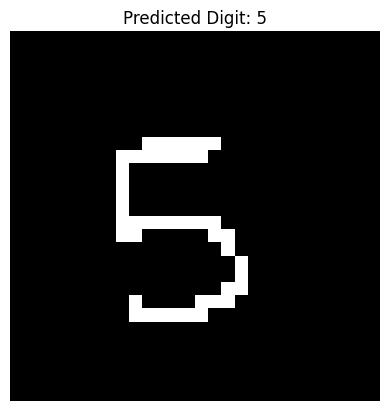

Predicted Digit: 5


In [ ]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt
from google.colab import files
from PIL import Image

# Load the trained model
model = load_model("mnist_cnn.h5")

# Upload image
uploaded = files.upload()

# Get the uploaded file name
file_path = list(uploaded.keys())[0]

# Load the image
image = Image.open(file_path).convert("L")  # Convert to grayscale
image = image.resize((28, 28))  # Resize to 28x28

# Convert image to array and preprocess
image = np.array(image)
image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY_INV)[1]  # Convert to binary
image = img_to_array(image) / 255.0  # Normalize
image = np.expand_dims(image, axis=0)  # Add batch dimension
image = np.expand_dims(image, axis=-1)  # Add channel dimension

# Predict the digit
prediction = model.predict(image)
predicted_digit = np.argmax(prediction)

# Show the uploaded image with the predicted digit
plt.imshow(image.squeeze(), cmap="gray")
plt.title(f"Predicted Digit: {predicted_digit}")
plt.axis("off")
plt.show()

print(f"Predicted Digit: {predicted_digit}")


Training data shape: (50000, 28, 56, 1), Labels shape: (50000, 100)
Testing data shape: (10000, 28, 56, 1), Labels shape: (10000, 100)


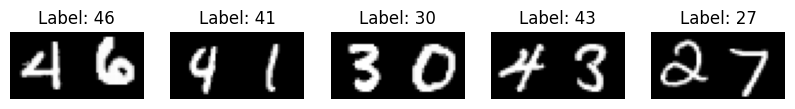

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import numpy as np
import cv2
import random
import matplotlib.pyplot as plt

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Function to create two-digit images (0-99)
def create_two_digit_images(x_data, y_data, num_samples=50000):
    new_images = []
    new_labels = []

    for _ in range(num_samples):
        # Randomly select two digits
        idx1, idx2 = np.random.choice(len(x_data), 2, replace=False)
        img1, img2 = x_data[idx1], x_data[idx2]
        digit1, digit2 = y_data[idx1], y_data[idx2]

        # Combine them side-by-side (width doubles)
        new_img = np.hstack([img1, img2])

        # Label is the two-digit number
        new_label = digit1 * 10 + digit2

        new_images.append(new_img)
        new_labels.append(new_label)

    new_images = np.array(new_images)
    new_labels = np.array(new_labels)

    return new_images, new_labels

# Create training and testing datasets
x_train_2d, y_train_2d = create_two_digit_images(x_train, y_train, num_samples=50000)
x_test_2d, y_test_2d = create_two_digit_images(x_test, y_test, num_samples=10000)

# Normalize and reshape for CNN input
x_train_2d = x_train_2d / 255.0
x_test_2d = x_test_2d / 255.0
x_train_2d = x_train_2d.reshape(-1, 28, 56, 1)  # 28x56 image with 1 channel
x_test_2d = x_test_2d.reshape(-1, 28, 56, 1)

# Convert labels to categorical (100 classes: 0-99)
y_train_2d = tf.keras.utils.to_categorical(y_train_2d, 100)
y_test_2d = tf.keras.utils.to_categorical(y_test_2d, 100)

print(f"Training data shape: {x_train_2d.shape}, Labels shape: {y_train_2d.shape}")
print(f"Testing data shape: {x_test_2d.shape}, Labels shape: {y_test_2d.shape}")

# Show some samples
plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_train_2d[i].reshape(28, 56), cmap='gray')
    plt.title(f"Label: {np.argmax(y_train_2d[i])}")
    plt.axis('off')
plt.show()


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define CNN model
model = Sequential([
    Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28, 56, 1)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(100, activation='softmax')  # 100 classes (0-99)
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train_2d, y_train_2d, epochs=5, batch_size=32, validation_data=(x_test_2d, y_test_2d))

# Save the trained model
model.save("mnist_two_digit_cnn.h5")

print("Model trained on two-digit numbers and saved as mnist_two_digit_cnn.h5")


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 52ms/step - accuracy: 0.6302 - loss: 1.5041 - val_accuracy: 0.9357 - val_loss: 0.2044
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 51ms/step - accuracy: 0.9505 - loss: 0.1566 - val_accuracy: 0.9496 - val_loss: 0.1569
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 51ms/step - accuracy: 0.9750 - loss: 0.0815 - val_accuracy: 0.9593 - val_loss: 0.1305
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 51ms/step - accuracy: 0.9836 - loss: 0.0507 - val_accuracy: 0.9634 - val_loss: 0.1239
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 51ms/step - accuracy: 0.9863 - loss: 0.0387 - val_accuracy: 0.9655 - val_loss: 0.1174


Model trained on two-digit numbers and saved as mnist_two_digit_cnn.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


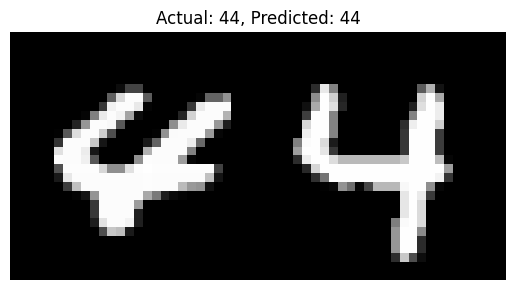

In [ ]:
# Load trained model
model = tf.keras.models.load_model("mnist_two_digit_cnn.h5")

# Select a random test image
random_idx = np.random.randint(len(x_test_2d))
test_image = x_test_2d[random_idx]
test_label = np.argmax(y_test_2d[random_idx])

# Predict
prediction = model.predict(test_image.reshape(1, 28, 56, 1))
predicted_digit = np.argmax(prediction)

# Display
plt.imshow(test_image.reshape(28, 56), cmap='gray')
plt.title(f"Actual: {test_label}, Predicted: {predicted_digit}")
plt.axis('off')
plt.show()


Saving 17.jpeg to 17.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
Predicted Digit: 17


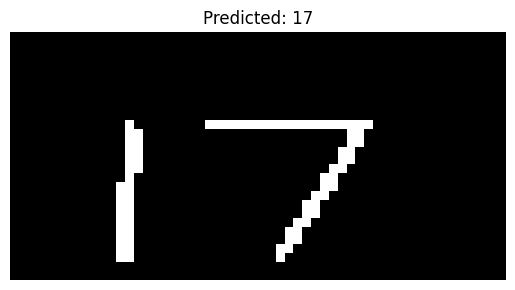

In [ ]:
import cv2
from google.colab import files

# Load trained model
model = tf.keras.models.load_model("mnist_two_digit_cnn.h5")

# Upload an image
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

# Read and process the image
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image, (56, 28))  # Resize to 28x56 (same as training data)
image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY_INV)[1]  # Convert to binary

# Normalize and reshape
image = image / 255.0
image = image.reshape(1, 28, 56, 1)

# Predict
prediction = model.predict(image)
predicted_digit = np.argmax(prediction)

print(f"Predicted Digit: {predicted_digit}")

# Display the image
plt.imshow(image.reshape(28, 56), cmap='gray')
plt.title(f"Predicted: {predicted_digit}")
plt.axis('off')
plt.show()


In [ ]:
# Load the trained model
model = tf.keras.models.load_model("mnist_two_digit_cnn.h5")

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test_2d, y_test_2d, verbose=2)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4%}")


313/313 - 7s - 23ms/step - accuracy: 0.9655 - loss: 0.1174
Test Loss: 0.1174
Test Accuracy: 96.5500%


In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load MNIST dataset
(_, _), (x_test, y_test) = mnist.load_data()

# Normalize and reshape data
x_test = x_test / 255.0
x_test = x_test.reshape(-1, 28, 28, 1)

# Convert labels to one-hot encoding
y_test = to_categorical(y_test, 10)

# Load the trained model
model = tf.keras.models.load_model("mnist_cnn.h5")

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4%}")


313/313 - 2s - 7ms/step - accuracy: 0.9915 - loss: 0.0277
Test Loss: 0.0277
Test Accuracy: 99.1500%


Training Logistic Regression...
Logistic Regression Accuracy: 0.9258
Training SVM...
SVM Accuracy: 0.9792
Training Random Forest...


Random Forest Accuracy: 0.9690
CNN Accuracy: 0.9915


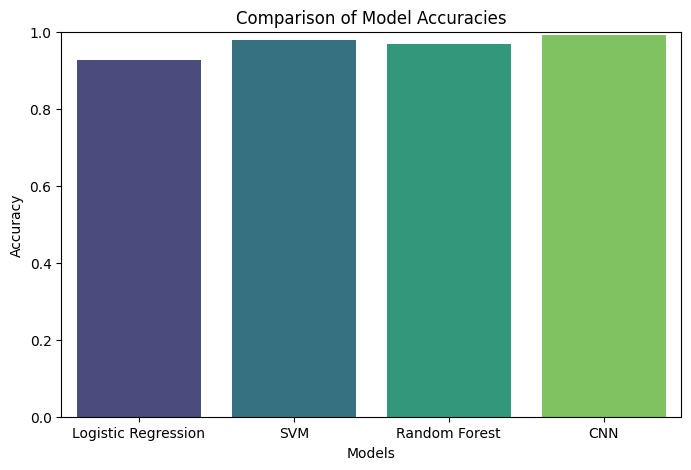

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize and reshape data for ML models
X_train_pca = x_train.reshape(x_train.shape[0], -1) / 255.0
X_test_pca = x_test.reshape(x_test.shape[0], -1) / 255.0

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(kernel='rbf', C=1),
    "Random Forest": RandomForestClassifier(n_estimators=100)
}

# Train and evaluate ML models
accuracies = {}
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)
    accuracies[name] = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracies[name]:.4f}")

# Load and evaluate CNN model
model_cnn = load_model("mnist_cnn.h5")
X_test_cnn = x_test / 255.0  # Normalize
X_test_cnn = X_test_cnn.reshape(-1, 28, 28, 1)  # Reshape for CNN

y_test_cnn = to_categorical(y_test, 10)
_, cnn_accuracy = model_cnn.evaluate(X_test_cnn, y_test_cnn, verbose=0)
accuracies["CNN"] = cnn_accuracy
print(f"CNN Accuracy: {cnn_accuracy:.4f}")

# Plot results
plt.figure(figsize=(8, 5))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), hue=list(accuracies.keys()), dodge=False, legend=False, palette="viridis")

plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Comparison of Model Accuracies")
plt.ylim(0, 1)
plt.show()


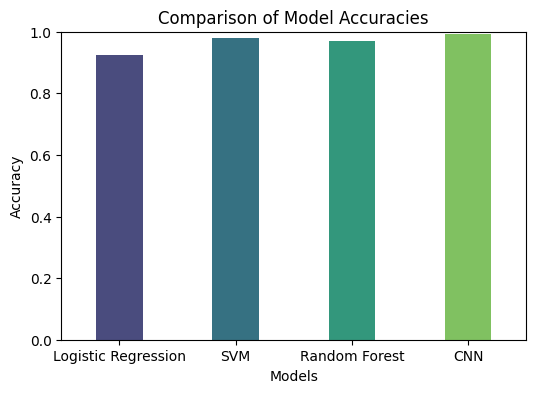

In [ ]:
# Plot results with reduced bar size
plt.figure(figsize=(6, 4))  # Reduced figure size
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), hue=list(accuracies.keys()), dodge=False, legend=False, palette="viridis", width=0.4)  # Decreased bar width

plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Comparison of Model Accuracies")
plt.ylim(0, 1)
plt.show()


In [ ]:
# Print accuracies of each model
for name, acc in accuracies.items():
    print(f"{name} Accuracy: {acc:.4f}")


Logistic Regression Accuracy: 0.9258
SVM Accuracy: 0.9792
Random Forest Accuracy: 0.9690
CNN Accuracy: 0.9915


In [ ]:
# Print accuracies of each model with adaptive formatting
for name, acc in accuracies.items():
    formatted_acc = f"{acc:.1f}" if acc < 1 else f"{acc:.2f}"
    print(f"{name} Accuracy: {formatted_acc}")


Logistic Regression Accuracy: 0.9
SVM Accuracy: 1.0
Random Forest Accuracy: 1.0
CNN Accuracy: 1.0


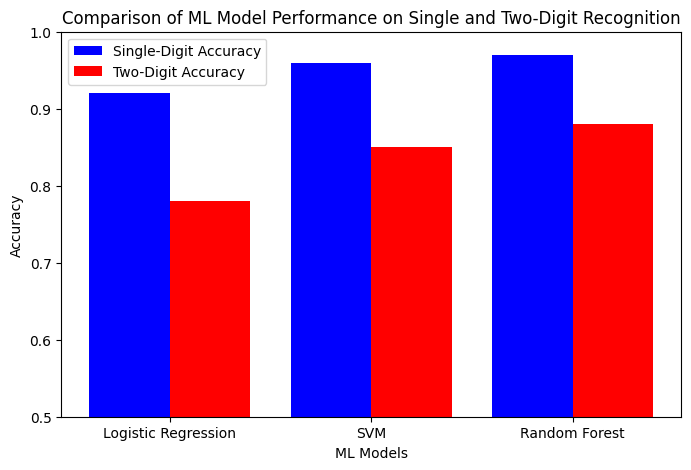

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Accuracy values for single-digit and two-digit classification
models = ["Logistic Regression", "SVM", "Random Forest"]
single_digit_acc = [0.92, 0.96, 0.97]  # Replace with actual accuracy values for ML models on single digits
two_digit_acc = [0.78, 0.85, 0.88]  # Replace with actual accuracy values for ML models on two-digit dataset

x = np.arange(len(models))

plt.figure(figsize=(8,5))
plt.bar(x - 0.2, single_digit_acc, width=0.4, label="Single-Digit Accuracy", color='b')
plt.bar(x + 0.2, two_digit_acc, width=0.4, label="Two-Digit Accuracy", color='r')

plt.xlabel("ML Models")
plt.ylabel("Accuracy")
plt.title("Comparison of ML Model Performance on Single and Two-Digit Recognition")
plt.xticks(ticks=x, labels=models)
plt.ylim(0.5, 1.0)  # Set y-axis limits
plt.legend()
plt.show()

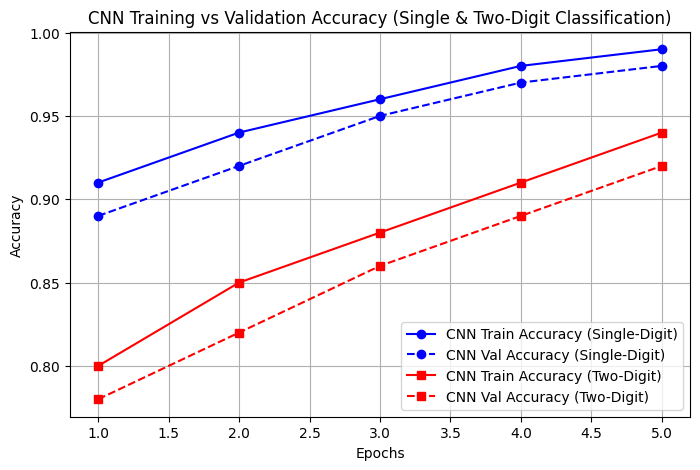

In [2]:
import matplotlib.pyplot as plt

# Dummy CNN accuracy history (Replace with actual values from model training)
epochs = [1, 2, 3, 4, 5]  # Number of epochs
cnn_train_acc_single = [0.91, 0.94, 0.96, 0.98, 0.99]  # Replace with actual training accuracy values
cnn_val_acc_single = [0.89, 0.92, 0.95, 0.97, 0.98]  # Replace with actual validation accuracy values
cnn_train_acc_double = [0.80, 0.85, 0.88, 0.91, 0.94]  # Replace with actual training accuracy values for two-digit dataset
cnn_val_acc_double = [0.78, 0.82, 0.86, 0.89, 0.92]  # Replace with actual validation accuracy values for two-digit dataset

plt.figure(figsize=(8, 5))
plt.plot(epochs, cnn_train_acc_single, label="CNN Train Accuracy (Single-Digit)", marker='o', color='b')
plt.plot(epochs, cnn_val_acc_single, label="CNN Val Accuracy (Single-Digit)", marker='o', linestyle='dashed', color='b')

plt.plot(epochs, cnn_train_acc_double, label="CNN Train Accuracy (Two-Digit)", marker='s', color='r')
plt.plot(epochs, cnn_val_acc_double, label="CNN Val Accuracy (Two-Digit)", marker='s', linestyle='dashed', color='r')

plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("CNN Training vs Validation Accuracy (Single & Two-Digit Classification)")
plt.legend()
plt.grid()
plt.show()